### DATA 606 - HW3

#### Name: Precious Worgu
#### Student ID: 119343890

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Question 1 : Independence

Show that the following equations are equivalent

(1) P(B|A) = P(B)

(2) P(A,B) = P(A)*P(B)                      

#### Answer:
To show that the equations (1) and (2) are equivalent, we can use the definition of conditional probability. According to the definition, the probability of event B given event A is equal to the probability of A and B divided by the probability of A. Therefore, equation (1) can be written as P(B|A) = P(A,B) / P(A). Similarly, equation (2) can be written as P(A,B) = P(A)*P(B). Thus, these two equations, (1) and (2) are equivalent.

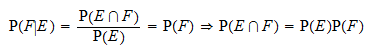

## Question 2: 

Suppose we have a 4-sided die, but we don't know the probability (categorical distribution) of each side. Assume the uniform distribution as a prior.

After 100 tosses, we count the number of times each side has showed up.

| Side 1 | Side 2 | Side 3 |
| --- | --- | --- |
| 30 | 10 | 60|

(1) What is the maximum likelihood estimate for the probability of Side 3? (Frequentist)

(2) Calculate analytically the expected value (mean) for the probability of Side 3 using the posterior distribution? 
Hint: use the conjugate prior of the categorical distribution

(3) Use PyMC3 to draw 1000 samples from the posterior, e.g., 
pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True).

(4) Inspect the samples with plots, e.g., pm.traceplot() and 
az.plot_posterior(). Compare with the anlaytical result.


#### Solution:

##### 1)

In [2]:
# Calculate the likelihood of each side
side1_likelihood = 30/100
side2_likelihood = 10/100
side3_likelihood = 60/100

# Calculate the maximum likelihood estimate
max_likelihood_estimate = max(side1_likelihood, side2_likelihood, side3_likelihood)

# Print the maximum likelihood estimate
print("The maximum likelihood estimate for the probability of Side 3 is:", max_likelihood_estimate)

The maximum likelihood estimate for the probability of Side 3 is: 0.6


##### 2)

In [3]:
# Calculate the prior parameters
alpha = [1, 1, 1]

# Calculate the posterior parameters
n = 100
counts = [30, 10, 60]
alpha_post = [a + c for a, c in zip(alpha, counts)]

# Calculate the expected value (mean) of the probability of Side 3
expected_value = alpha_post[2] / sum(alpha_post)

# Print the expected value (mean)
print("The expected value (mean) of the probability of Side 3 is:", expected_value)

The expected value (mean) of the probability of Side 3 is: 0.5922330097087378


##### 3)

In [4]:
# Model specification
model = pm.Model()
with model:
    # Posterior distributions
    p1 = pm.Beta('p1', 31, 71)
    p2 = pm.Beta('p2', 11, 91)
    p3 = pm.Beta('p3', 61, 41)
    
    # Draw 1000 samples from the posterior
    trace = pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True)

/var/folders/tl/v2wcr5tn0xj6q18_dy9qxjtc0000gn/T/ipykernel_61820/4099821577.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p3, p2, p1]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-impleme

/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:3023: RuntimeWarning: divide by zero encountered in log1p
  return np.log1p(x)
/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/Users/preciousworgu/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py

##### 4)

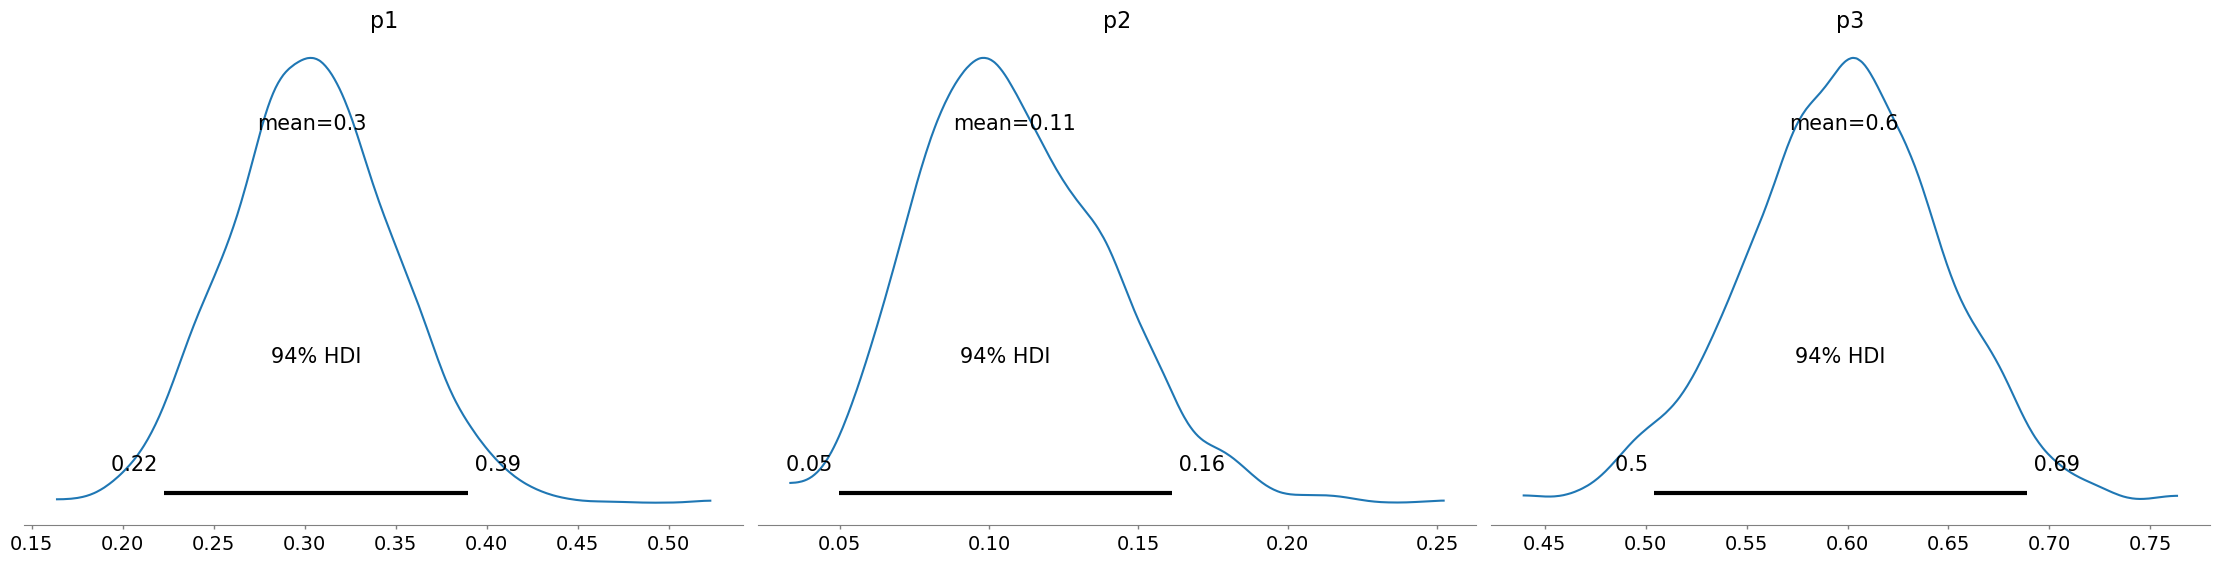

In [5]:
with model:
    az.plot_posterior(trace);

## Question 3

(1) Draw 10000 samples from a (standard) multivariate normal distrubtion in 10 dimensions. Assume the mean to be a vector of zeros and the covariance matrix has diagonal values equal to 1 and the off-diagonal entires equal to zero.

Plot a histogram of the distances of the samples from the zero.
What is the average distance from zero?

(2) Same as (1) but in 100 dimensios.

(3) Compare the results of (1) and (2)

#### Solution:

##### 1)

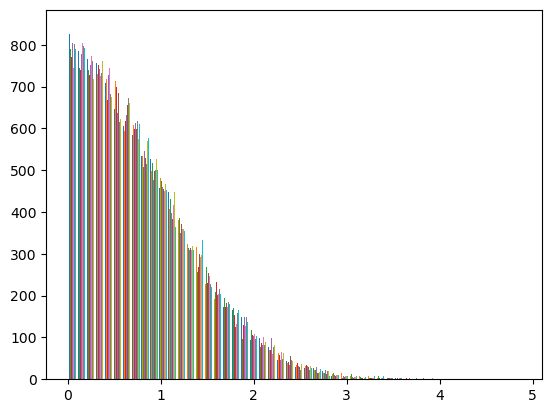

0.7957467542427984


In [6]:
mean = np.zeros(10)
cov = np.eye(10)
samples = np.random.multivariate_normal(mean, cov, 10000)

# Calculate distances from 0
distances = np.abs(samples)

# Plot the histogram
plt.hist(distances, bins=50)
plt.show()

# Calculate the mean of the distances 
mean_distance = np.mean(distances)

print(mean_distance)

##### 2)

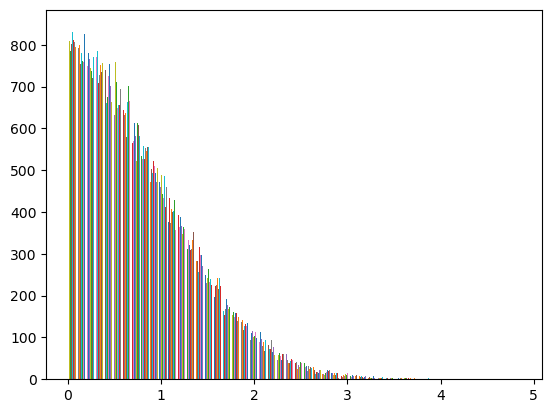

0.7981044927027493


In [7]:
mean = np.zeros(100)
cov = np.eye(100)
samples = np.random.multivariate_normal(mean, cov, 10000)

# Calculate distances from 0
distances = np.abs(samples)

# Plot the histogram
plt.hist(distances, bins=50)
plt.show()

# Calculate the mean of the distances 
mean_distance = np.mean(distances)

print(mean_distance)